## 25-26: 4369 -- PROGRAMMING FOR DATA ANALYTICS  
## Topic 06 :Timeseries and synthetic data   
   
# Assignment 6 Knock airport Weather   
Author:  Niall Naughton  
Date:  02/11/2025  

***
## <font color="crimson">Part 1 60%</font>
Create a notebook called assignment_6_Weather.ipynb  
Get the data from this link.  

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv   

(This is different that the data I used in the lecture)   

Plot:   
*  The temperature  
*  The mean temperature each day  
*  The mean temperature for each month.  

   
Initially look at data in CSV File hly4935.csv ...

In [5]:
#Load CSV data from URL and initially display the first 10 rows
import pandas as pd

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
# The first 24 lines are metadata and should be skipped
df = pd.read_csv(url, skiprows=23)
df.head(10)

C:\Users\Niall\AppData\Local\Temp\ipykernel_20028\281773924.py:6: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
6,31-jul-1996 13:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,0,0,2,11,0.0,40000,43,5
7,31-jul-1996 14:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,0,0,2,11,0.0,50000,45,6
8,31-jul-1996 15:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,0,0,25,82,0.0,8000,45,7
9,31-jul-1996 16:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,0,0,25,82,0.0,35000,40,7


Columns are as follows (Extracted from file's metadata)

*  date:  -  Date and Time (utc)   
*  rain:  -  Precipitation Amount (mm)	     
*  temp:  -  Air Temperature (C)	   
*  wetb:  -  Wet Bulb Temperature (C)   
*  dewpt: -  Dew Point Temperature (C)                
*  rhum:  -  Relative Humidity (%)   
*  vappr: -  Vapour Pressure (hPa)	    
*  msl:   -  Mean Sea Level Pressure (hPa)   
*  wdsp:  -  Mean Wind Speed (knot)   
*  wddir: -  Predominant Wind Direction (degree)   
*  ww:    -  Synop code for Present Weather   
*  w:     -  Synop code for Past Weather   
*  sun:   -  Sunshine duration (hours)   
*  vis:   -  Visibility (m)   
*  clht:  -  Cloud height (100's of ft) - 999 if none    
*  clamt: -  Cloud amount   
*  ind:   -  Indicator   

There are 3 Temperatures Air,WetBulb, and Dew Point.   
**For this task we will assume "temperature" is the column temp (Air Temperature (C))**   

Lets reload data with only the [date] and [temp] columns   


<font color='crimson'>**Note: Dataset was found to be quite large and took a long time to plot data, so data was filtered by Year**</font>   

Text(0.5, 1.0, 'Hourly Temperature Data for 2024')

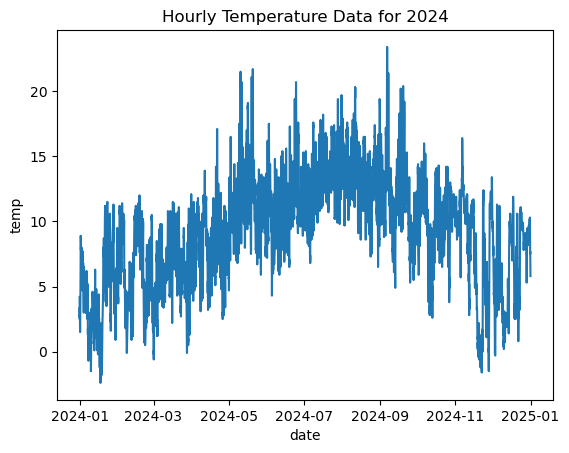

In [17]:
import pandas as pd
import seaborn as sns

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
columns = ['date','temp']
df = pd.read_csv(url, usecols=columns, skiprows=23)
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')

# Filter by a specific year (2024) ... Plotting all years taking too long
year = 2024
df_year = df[df['date'].dt.year == year]
sns.lineplot(data=df_year, x='date', y='temp').set_title(f'Hourly Temperature Data for {year}')

## The Mean Temperature each Day

Text(0.5, 1.0, 'Daily Mean Temperature Data for 2024')

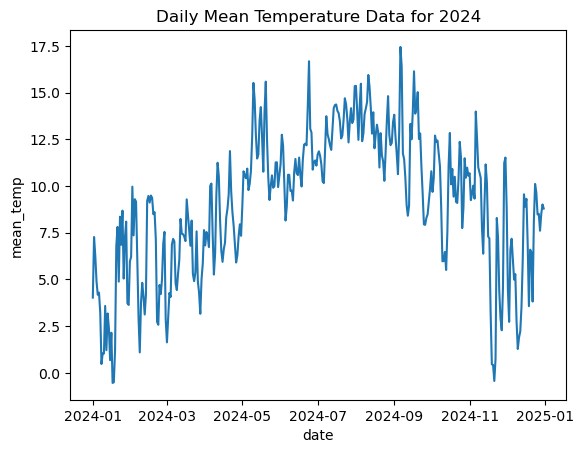

In [16]:
df_daily_mean = df_year.groupby(df_year['date'].dt.date)['temp'].mean().reset_index()
df_daily_mean.columns = ['date', 'mean_temp']

sns.lineplot(data=df_daily_mean, x='date', y='mean_temp').set_title(f'Daily Mean Temperature Data for {year}')

## The mean temperature for each month.

Text(0.5, 1.0, 'Mean Monthly Temperature Data')

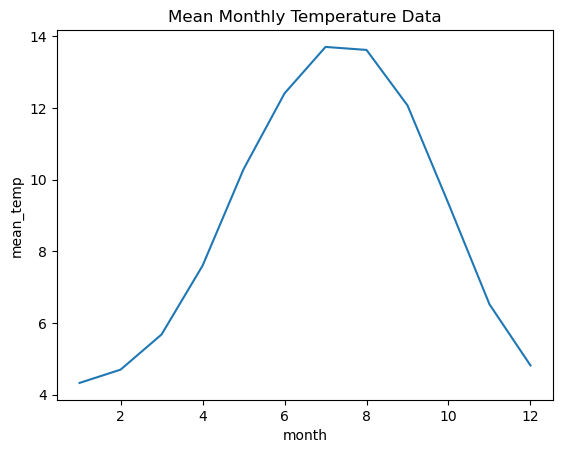

In [21]:
#Since we are looking at monthly averages we can use the full data set
df_monthly_mean = df.groupby(df['date'].dt.month)['temp'].mean().reset_index()
df_monthly_mean.columns = ['month', 'mean_temp']

sns.lineplot(data=df_monthly_mean, x='month', y='mean_temp').set_title(f'Mean Monthly Temperature Data')

***
## <font color="crimson">Part 2 40%</font>
Plot:  
  
*  The Windspeed (there is data missing from this column)  
*  The rolling windspeed (say over 24 hours)  
*  The max windspeed for each day  
*  The monthly mean of the daily max windspeeds (yer I am being nasty here)  

You do not need to over comment your code. Marks will be given for how nice the plots are.  




C:\Users\Niall\AppData\Local\Temp\ipykernel_20028\3802919013.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, usecols=columns, skiprows=23)


Text(0.5, 1.0, 'Mean Wind Speed Data for 2024')

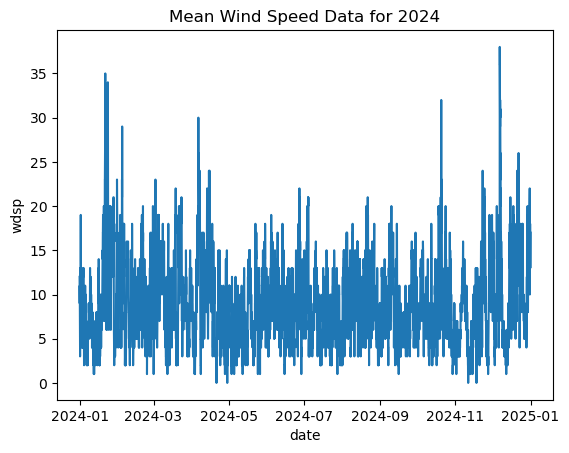

In [ ]:
'''

***********************************************************
    INCOMPLETE - The Code below is WORK IN PROGRESS
***********************************************************
import pandas as pd
import seaborn as sns

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
columns = ['date','wdsp']
df = pd.read_csv(url, usecols=columns, skiprows=23)
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')

# Filter by a specific year (2024) ... Plotting all years taking too long
year = 2024
df_year = df[df['date'].dt.year == year]
sns.lineplot(data=df_year, x='date', y='wdsp').set_title(f'Mean Wind Speed Data for {year}')
'''